# IMDB

## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## CLASE 1: EDA + Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
imdb = pd.read_csv("datasets/IMDB.csv", sep=";", index_col=[0])

In [3]:
imdb

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
95,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
96,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
97,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


In [4]:
imdb.shape

(99, 13)

In [5]:
type(imdb.shape)

tuple

In [6]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 88 non-null     object 
 1   director_name         88 non-null     object 
 2   duration              99 non-null     int64  
 3   gross                 91 non-null     float64
 4   genres                98 non-null     object 
 5   movie_title           99 non-null     object 
 6   title_year            99 non-null     int64  
 7   language              99 non-null     object 
 8   country               99 non-null     object 
 9   budget                95 non-null     float64
 10  imdb_score            99 non-null     float64
 11  actors                99 non-null     object 
 12  movie_facebook_likes  99 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.8+ KB


In [7]:
# nos dice, por cada columna, si hay valores null -> NaN
imdb.isnull().any()

color                    True
director_name            True
duration                False
gross                    True
genres                   True
movie_title             False
title_year              False
language                False
country                 False
budget                   True
imdb_score              False
actors                  False
movie_facebook_likes    False
dtype: bool

In [8]:
# para sacar las columnas con valores NaN
columna_nulos = imdb.columns[imdb.isnull().any()]

In [9]:
columna_nulos

Index(['color', 'director_name', 'gross', 'genres', 'budget'], dtype='object')

In [10]:
# saca por la columna "color" las value y cuantas veces aparecen
imdb["color"].value_counts()

Color               86
 Black and White     1
color                1
Name: color, dtype: int64

In [11]:
# saca por la columna "director_name" las value y cuantas veces aparecen
imdb["director_name"].value_counts()

Ridley Scott         4
Michael Bay          3
Sam Mendes           3
Christopher Nolan    3
Timur Bekmambetov    3
                    ..
Paul Greengrass      1
Jay Oliva            1
Tony Gilroy          1
Ryan Murphy          1
Gore Verbinski       1
Name: director_name, Length: 63, dtype: int64

In [12]:
# sacame todas las filas donde el director_name es NaN
# esto se hace para luego cambiar los valores NaN con valores "", porque el MODELO no entiende el NaN pero si el NULL
imdb[imdb["director_name"].isnull()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
5,NaN,NaN,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
24,Color,NaN,156,183635922.0,Adventure|Drama|Thriller|Western,The Revenant,2015,English,USA,135000000.0,8.1,"Leonardo DiCaprio,Tom Hardy,Lukas Haas",190000
32,Color,NaN,150,182204440.0,Biography|Drama|History|War,Lincoln,2012,English,USA,65000000.0,7.4,"Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill",71000
41,Color,NaN,147,407197282.0,Action|Adventure|Sci-Fi,Captain America: Civil War,2016,English,USA,250000000.0,8.2,"Robert Downey Jr.,Scarlett Johansson,Chris Evans",72000
56,NaN,NaN,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
59,Color,NaN,142,407999255.0,Adventure|Drama|Sci-Fi|Thriller,The Hunger Games,2012,English,USA,78000000.0,7.3,"Jennifer Lawrence,Josh Hutcherson,Anthony Reyn...",140000
71,Color,NaN,139,150832203.0,Adventure|Mystery|Sci-Fi,Divergent,2014,English,USA,85000000.0,6.7,"Kate Winslet,Theo James,Mekhi Phifer",49000
75,Color,NaN,138,150117807.0,Crime|Drama,American Hustle,2013,English,USA,40000000.0,7.3,"Jennifer Lawrence,Christian Bale,Bradley Cooper",63000
82,Color,NaN,137,37304950.0,Biography|Crime|Drama,J. Edgar,2011,English,USA,35000000.0,6.6,"Leonardo DiCaprio,Naomi Watts,Kaitlyn Dever",16000
84,Color,NaN,137,281666058.0,Adventure|Sci-Fi,The Hunger Games: Mockingjay - Part 2,2015,English,USA,160000000.0,6.6,"Jennifer Lawrence,Philip Seymour Hoffman,Josh ...",38000


In [13]:
# SLICING
# cuidado con el hacer siempre copias de df pero la info punta siempre al mismo df
director_nulo_mayorde140mins = imdb[ (imdb["director_name"].isnull()) & (imdb["duration"] >= 140) ]

In [14]:
# aplicar algo al resultado
imdb["gross"].describe().apply("{0:.2f}".format)

count           91.00
mean     154191431.27
std      139950256.82
min          41229.00
25%       47206317.50
50%      115603980.00
75%      237489430.50
max      623279547.00
Name: gross, dtype: object

In [15]:
imdb["gross"].min()
imdb["gross"].max()
imdb["gross"].mean()

154191431.2747253

In [16]:
imdb[(imdb["gross"] > 600000000)].head(10)

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000


array([[<AxesSubplot:title={'center':'gross'}>]], dtype=object)

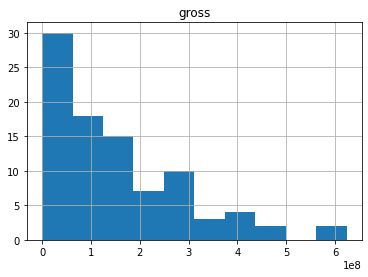

In [17]:
imdb.hist(column="gross")

In [18]:
imdb[ (imdb["gross"] > 500000000) & (imdb["gross"] < 5600000000) ]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000


In [19]:
# ver valores duplicados (cuidado: toda la fila tiene que ser duplicada, seno no sale nada)
imdb.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: bool

In [20]:
# ver FILAS duplicadas (cuidado: todos los valores de la fila tienen que ser duplicados, seno no sale nada)
# keep=False -> hace que la fila y su duplicado sean añadidos al resultado
imdb[imdb.duplicated(keep=False)]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
20,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
21,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
30,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
31,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
52,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
53,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
54,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
55,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000


# When keep=True :
## only the duplicated row is sorted ( this is the setting to use when you perform the drop() )
# When keep=False :
## both row are sorted (not only the duplicated one)

In [21]:
# ejemplo de usar keep=False
df_test = pd.DataFrame(["a","b","c","d","a","b"])
print(df_test.T)

print("")
#SIN keep=False -> le decimos de sacar solo las filas duplicada (solo duplicados)
df_test_only_duplicate = df_test[df_test.duplicated()]
print(df_test_only_duplicate.T)

print("")
#CON keep=False -> le decimos de sacar todas las filas de duplicado (original y duplicados)
df_test_only_duplicate_ALL = df_test[df_test.duplicated(keep=False)]
print(df_test_only_duplicate_ALL.T)

   0  1  2  3  4  5
0  a  b  c  d  a  b

   4  5
0  a  b

   0  1  4  5
0  a  b  a  b


### Deep copy creates new id's of every object it contains
### while normal copy only copies the elements from the parent and creates a new id for a variable to which it is copied to.

In [22]:
# no queremos trabajar sobre el IMDB original, asi creamos una copia antes
# creamos un nuevo DF, con nuevo ID
imdb_sin_valores_duplicado = imdb.copy(deep=True)

In [23]:
#lo que sigue es para entender lo de LAS COPIAS que hay que hacer
# sacamos el ID del nuevo DF
# N.B. el ID de un objeto cambia a cada EJECUCION que se realize
print("id del DF imdb: " + str(id(imdb)))
print("id del DF imdb_sin_valores_duplicado: " + str(id(imdb_sin_valores_duplicado)))

id del DF imdb: 2120115481088
id del DF imdb_sin_valores_duplicado: 2120154179568


In [24]:
# asi es como un preview
# imdb_sin_valores_duplicado.drop_duplicates()

# --->   BORRAMOS LAS FILAS DUPLICADA   <---
# con inplace=True es 'real', el DF estara modificado
imdb_sin_valores_duplicado.drop_duplicates(inplace=True)

# When inplace = True :
## the data is modified in place, which means it will return nothing and the dataframe is now updated.
# When inplace = False :
## (which is the default) then the operation is performed and it returns a copy of the object. You then need to save it to something.

In [25]:
imdb_sin_valores_duplicado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 82 non-null     object 
 1   director_name         82 non-null     object 
 2   duration              93 non-null     int64  
 3   gross                 86 non-null     float64
 4   genres                92 non-null     object 
 5   movie_title           93 non-null     object 
 6   title_year            93 non-null     int64  
 7   language              93 non-null     object 
 8   country               93 non-null     object 
 9   budget                89 non-null     float64
 10  imdb_score            93 non-null     float64
 11  actors                93 non-null     object 
 12  movie_facebook_likes  93 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.2+ KB


In [26]:
# reseteamos LOS INDICES que se han visto modificado cuando hemos borrado filas
# drop=True -> borrar el indice antiguo y inplace=True -> hace que sea real
imdb_sin_valores_duplicado.reset_index(drop=True, inplace=True)

In [27]:
imdb_sin_valores_duplicado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 82 non-null     object 
 1   director_name         82 non-null     object 
 2   duration              93 non-null     int64  
 3   gross                 86 non-null     float64
 4   genres                92 non-null     object 
 5   movie_title           93 non-null     object 
 6   title_year            93 non-null     int64  
 7   language              93 non-null     object 
 8   country               93 non-null     object 
 9   budget                89 non-null     float64
 10  imdb_score            93 non-null     float64
 11  actors                93 non-null     object 
 12  movie_facebook_likes  93 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 9.6+ KB


In [28]:
# BORRAMOS LA COLUMNA color (porque es irilevante)
imdb_sin_valores_duplicado.drop(columns=["color"], inplace=True)


In [29]:
# controlamos que se ha eliminada la columna color (si! ahora hay solo 12 columnas)
imdb_sin_valores_duplicado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   director_name         82 non-null     object 
 1   duration              93 non-null     int64  
 2   gross                 86 non-null     float64
 3   genres                92 non-null     object 
 4   movie_title           93 non-null     object 
 5   title_year            93 non-null     int64  
 6   language              93 non-null     object 
 7   country               93 non-null     object 
 8   budget                89 non-null     float64
 9   imdb_score            93 non-null     float64
 10  actors                93 non-null     object 
 11  movie_facebook_likes  93 non-null     int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 8.8+ KB


# rellenar los nulos

In [30]:
# RELLENAMOS los NaN con valores "" (vacio), porque el MODELO no entiende el NaN o NULL pero si el "" (vacio)
imdb_sin_valores_duplicado["director_name"].fillna("", inplace=True)

In [31]:
# controlamos que no hay ahora valores NaN en la columna director_name 
imdb_sin_valores_duplicado[imdb_sin_valores_duplicado["director_name"].isnull()]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes


In [32]:
# COMPROBAMOS que se han borrados, sacando el num() de los valores isnull() de la columna "director_name"
imdb_sin_valores_duplicado["director_name"].isnull().sum()

0

In [33]:
# los valores vacio de director_name (son 11)
imdb_sin_valores_duplicado[imdb_sin_valores_duplicado["director_name"] =="" ]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
5,,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
22,,156,183635922.0,Adventure|Drama|Thriller|Western,The Revenant,2015,English,USA,135000000.0,8.1,"Leonardo DiCaprio,Tom Hardy,Lukas Haas",190000
29,,150,182204440.0,Biography|Drama|History|War,Lincoln,2012,English,USA,65000000.0,7.4,"Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill",71000
38,,147,407197282.0,Action|Adventure|Sci-Fi,Captain America: Civil War,2016,English,USA,250000000.0,8.2,"Robert Downey Jr.,Scarlett Johansson,Chris Evans",72000
51,,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
54,,142,407999255.0,Adventure|Drama|Sci-Fi|Thriller,The Hunger Games,2012,English,USA,78000000.0,7.3,"Jennifer Lawrence,Josh Hutcherson,Anthony Reyn...",140000
65,,139,150832203.0,Adventure|Mystery|Sci-Fi,Divergent,2014,English,USA,85000000.0,6.7,"Kate Winslet,Theo James,Mekhi Phifer",49000
69,,138,150117807.0,Crime|Drama,American Hustle,2013,English,USA,40000000.0,7.3,"Jennifer Lawrence,Christian Bale,Bradley Cooper",63000
76,,137,37304950.0,Biography|Crime|Drama,J. Edgar,2011,English,USA,35000000.0,6.6,"Leonardo DiCaprio,Naomi Watts,Kaitlyn Dever",16000
78,,137,281666058.0,Adventure|Sci-Fi,The Hunger Games: Mockingjay - Part 2,2015,English,USA,160000000.0,6.6,"Jennifer Lawrence,Philip Seymour Hoffman,Josh ...",38000


In [34]:
imdb_sin_valores_duplicado["director_name"].value_counts()
# en la primera fila, el 11 == a los valores vacio de director_name

                     11
Michael Bay           3
Peter Jackson         3
Ridley Scott          3
Christopher Nolan     3
                     ..
Jay Oliva             1
Gore Verbinski        1
Tony Gilroy           1
Baz Luhrmann          1
Tom Hooper            1
Name: director_name, Length: 64, dtype: int64

In [35]:
imdb_sin_valores_duplicado["gross"].isnull().sum()

7

In [36]:
imdb_sin_valores_duplicado[ imdb_sin_valores_duplicado["gross"].isnull() ]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
7,Edward Hall,180,NaN,Drama|Romance,Restless,2012,English,UK,NaN,7.2,"Rufus Sewell,Hayley Atwell,Charlotte Rampling",434
25,Gnana Rajasekaran,153,NaN,Biography|Drama|History,Ramanujan,2014,English,India,NaN,7.0,"Mani Bharathi,Michael Lieber,Kevin McGowan",58
34,Jay Oliva,148,NaN,Action|Animation|Crime|Sci-Fi|Thriller,"Batman: The Dark Knight Returns, Part 2",2013,English,USA,3500000.0,8.4,"Michael Emerson,Mark Valley,Grey Griffin",5000
51,,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
56,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
57,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.0,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
86,Sadyk Sher-Niyaz,135,NaN,Action|Biography|Drama|History,Queen of the Mountains,2014,English,Kyrgyzstan,1400000.0,8.7,"Elina Abai Kyzy,Aziz Muradillayev,Mirlan Abdul...",0


## decidir como manejar los valores NaN de "gross"
## 1) poner a ZERO
## 2) poner un valor medio o mediana

In [37]:
# calculo la media
imdb_sin_valores_duplicado["gross"].mean()

148199826.9883721

In [38]:
# asigno la media a los valores NaN de "gross"
imdb_sin_valores_duplicado["gross"].fillna(  imdb_sin_valores_duplicado["gross"].mean(), inplace=True   )

In [39]:
# compruebo si hay valores NaN en "gross"
imdb_sin_valores_duplicado["gross"].isnull().sum()

0

In [40]:
# 
imdb_sin_valores_duplicado.isnull().sum()

director_name           0
duration                0
gross                   0
genres                  1
movie_title             0
title_year              0
language                0
country                 0
budget                  4
imdb_score              0
actors                  0
movie_facebook_likes    0
dtype: int64

## miramos los GENRES
### en el campo genres hay 4/5/6 string de generos - COMO LO MANEJAMOS ???
#### quieremos crear una columna por cada generos que hay y luego poner 1 si la peli es de este generos y 0 si no lo es

In [41]:
# CREAMOS un DF con todos le genres con METODO SPLIT() ---> sirve para separar
# il metodo .str() serve a trasformare il Df in serie ---> oggetto che supporta il metodo .split()
lista_de_generos = imdb_sin_valores_duplicado["genres"].str.split("|", expand=True)

# ATTRIBUTE EXPAND the split strings into separate columns.
# If True, return DataFrame/MultiIndex expanding dimensionality ---> pandas.core.frame.DataFrame
# If False, return Series/Index, containing lists of strings    ---> pandas.core.series.Series

In [42]:
lista_de_generos

,0,1,2,3,4
0,Biography,Comedy,Crime,Drama,None
1,Action,Adventure,Sci-Fi,None,None
2,Crime,Drama,Mystery,Thriller,Western
3,Drama,None,None,None,None
4,Adventure,Fantasy,None,None,None
...,...,...,...,...,...
88,Biography,Drama,History,None,None
89,Comedy,Drama,None,None,None
90,Biography,Drama,Thriller,None,None
91,Action,Drama,War,None,None


In [43]:
# RELLENAMOS los None con valores "" (vacio) porque el MODELO no entiende el NaN o NULL pero si el "" (vacio)
lista_de_generos.fillna("", inplace=True)

In [ ]:
# se CREA una columna y se asigna un valor (esto lo hacemos tanta veces cuantos hay de genres)
#imdb_sin_valores_duplicado["genero_1"] = lista_de_generos[0]
#imdb_sin_valores_duplicado["genero_2"] = lista_de_generos[1]
#imdb_sin_valores_duplicado["genero_3"] = lista_de_generos[2]
#imdb_sin_valores_duplicado["genero_4"] = lista_de_generos[3]
#imdb_sin_valores_duplicado["genero_5"] = lista_de_generos[4]

In [45]:
# borrar la antigua columna "genres"
del(imdb_sin_valores_duplicado["genres"])

In [46]:
imdb2 = imdb_sin_valores_duplicado

In [47]:
imdb2

,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Martin Scorsese,240,116866727.0,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Shane Black,195,408992272.0,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,Quentin Tarantino,187,54116191.0,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Kenneth Lonergan,186,46495.0,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Peter Jackson,186,258355354.0,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
...,...,...,...,...,...,...,...,...,...,...,...
88,Steve McQueen,134,56667870.0,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
89,Richard J. Lewis,134,7501404.0,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
90,Paul Greengrass,134,107100855.0,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
91,David Ayer,134,85707116.0,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


In [ ]:
imdb2["duration"].hist()

# tambien se puede escribir asi : imdb2.hist(column="duration")

In [ ]:
imdb2[imdb2["duration"]<=50]

In [ ]:
# hay dos valores anomalos en la duration -> lo se soluciona con un WHERE
# usamos un WHERE para asignar un valor mean a cada fila de la columna duration que sea <50, si no lo es: se deja su valor
# np.where(   condicion, que hago si la condicion es True, que hago si la condicion es False   )
imdb2["duration"]=np.where(  imdb2["duration"]<=50,  imdb2["duration"].mean(),  imdb2["duration"]  )

In [44]:
# esto es un Df con todos le generos
lista_de_generos

,0,1,2,3,4
0,Biography,Comedy,Crime,Drama,
1,Action,Adventure,Sci-Fi,,
2,Crime,Drama,Mystery,Thriller,Western
3,Drama,,,,
4,Adventure,Fantasy,,,
...,...,...,...,...,...
88,Biography,Drama,History,,
89,Comedy,Drama,,,
90,Biography,Drama,Thriller,,
91,Action,Drama,War,,
